In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("D:\\Sandesh\\Data Science\\Feature Selection\\train_digit_recognize.csv")
df.head()   

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X=df.drop(columns=['label'],axis=1)
y=df['label']

<AxesSubplot:>

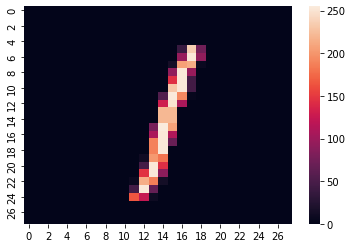

In [4]:
sns.heatmap(X.iloc[15].values.reshape(28,28))

In [5]:
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [6]:
rf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.01303449e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.04376841e-06, 1.03394469e-06,
       1.07597552e-05, 2.68415186e-06, 8.80751721e-07, 4.95462452e-06,
       2.86703855e-06, 9.87724627e-07, 5.08851157e-07, 4.08753956e-06,
       1.44289949e-06, 1.94281509e-06, 0.00000000e+00, 2.04832469e-06,
       3.52850409e-07, 0.00000000e+00, 1.52655954e-06, 3.65199902e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

<AxesSubplot:>

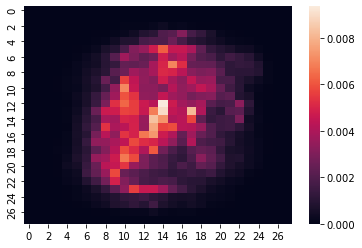

In [7]:

# It is showing the feature importance of every pixel 
# black color is not important
# Color region is important to predict the numbers.

sns.heatmap(rf.feature_importances_.reshape(28,28))


### Check Feature Importance by plotting Decision Trees

In [8]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [21]:
X,y=make_classification(n_samples=5,n_classes=2,
                        n_features=2,n_informative=2,n_redundant=0,
                        random_state=0)
X 

array([[ 0.96399434, -0.12399406],
       [ 1.05699092,  0.69448021],
       [-0.55744457,  0.08369352],
       [-1.19224399, -1.66447018],
       [-0.3874711 ,  1.38366234]])

In [22]:
clf=DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

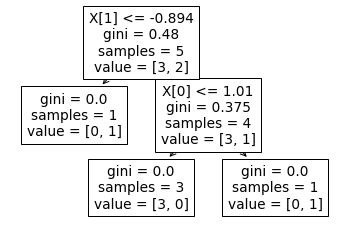

In [23]:
plot_tree(clf)
plt.show()

In [24]:
clf.feature_importances_

# Formula for getting feature importance

# For 0 - x/x+y  , For 1 - y/x+y

# Calculate the values from tree.
# For 1 =  5/5[0.48 -4/58*0.375 -1/5*0] = 0.18 = y
# For 0 = 4/5[0.375-0-0]    =  0.30 = x


# apply x and y values into main formula.
# For 0 = 0.30/0.30+0.18  = 0.625
# For 1 = 0.18/0.18+0.30 = 0.375

array([0.625, 0.375])

### Check Feature Importance by Plotting decision trees using 15 rows

In [25]:
X,y=make_classification(n_samples=15,n_classes=2,
                        n_features=2,n_informative=2,n_redundant=0,
                        random_state=0)
clf=DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

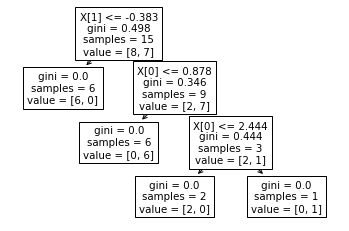

In [26]:
plot_tree(clf)
plt.show()

In [27]:
# For 1 = 15/15[0.498 - 9/15*0.346-0] = 0.290

# For 0 = 9/15[0.346-3/15*0.444-0] = 0.118
# For 0 = 3/15[0.444-0] = 0.088

# 0 = 0.11+0.08/0.290+0.118+0.088 = 0.41
# 1 = 0.290/0.290+0.118+0.088 = 0.58

clf.feature_importances_

array([0.41666667, 0.58333333])

### THE END